# **4 - Analyzing**

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing Pickle

In [2]:
with open('df.pkl', 'rb') as f:
    df = pickle.load(f)

with open('fighters.pkl', 'rb') as f:
    fighters = pickle.load(f)

with open('fights.pkl', 'rb') as f:
    fights = pickle.load(f)

## Summary Statistics

In [3]:
ages = pd.concat([df['A_Age'], df['B_Age']]).copy()
# Convert from Days to Years
ages = ages / 365
heights = pd.concat([df['A_Height'], df['B_Height']]).copy()
# Convert from CM to Feet
heights = heights / 30.48
# Convert from KG to LB
weights = pd.concat([df['A_Weight'], df['B_Weight']]).copy()
weights = weights * 2.20462
# Convert from CM to Inches
reaches = pd.concat([df['A_Reach'], df['B_Reach']]).copy()
reaches = reaches * 0.393701
stances = pd.concat([df['A_Stance'], df['B_Stance']]).copy()

# Age Average, Median, Min, Max in Years
print('Age')
print('************************************')
print('Average:', ages.mean())
print('Median:', ages.median())
print('Min:', ages.min())
print('Max:', ages.max())
print('------------------------------------')

# Height Average, Median, Min, Max in Feet
print('Height')
print('************************************')
print('Average:', heights.mean())
print('Median:', heights.median())
print('Min:', heights.min())
print('Max:', heights.max())
print('------------------------------------')

# Weight Average, Median, Min, Max in Pounds
print('Weight')
print('************************************')
print('Average:', weights.mean())
print('Median:', weights.median())
print('Min:', weights.min())
print('Max:', weights.max())

print('------------------------------------')
# Reach Average, Median, Min, Max in Inches
print('Reach')
print('************************************')
print('Average:', reaches.mean())
print('Median:', reaches.median())
print('Min:', reaches.min())
print('Max:', reaches.max())
print('------------------------------------')

# Most and Least Common Stance
print('Stance')
print('************************************')
print('Most Common:', stances.value_counts().idxmax())
print('Least Common:', stances.value_counts().idxmin())

Age
************************************
Average: 30.32123800711833
Median: 30.12054794520548
Min: 18.183561643835617
Max: 51.92602739726028
------------------------------------
Height
************************************
Average: 5.700176338570055
Median: 5.666666666666667
Min: 5.0
Max: 6.666666666666666
------------------------------------
Weight
************************************
Average: 168.10257004229192
Median: 160.00250111999998
Min: 115.00179768
Max: 770.0120366399999
------------------------------------
Reach
************************************
Average: 71.76717345964481
Median: 72.00003888
Min: 58.00003132
Max: 84.00004536000002
------------------------------------
Stance
************************************
Most Common: Orthodox
Least Common: Sideways


## Visualizations

### Age, Height, Weight, Reach

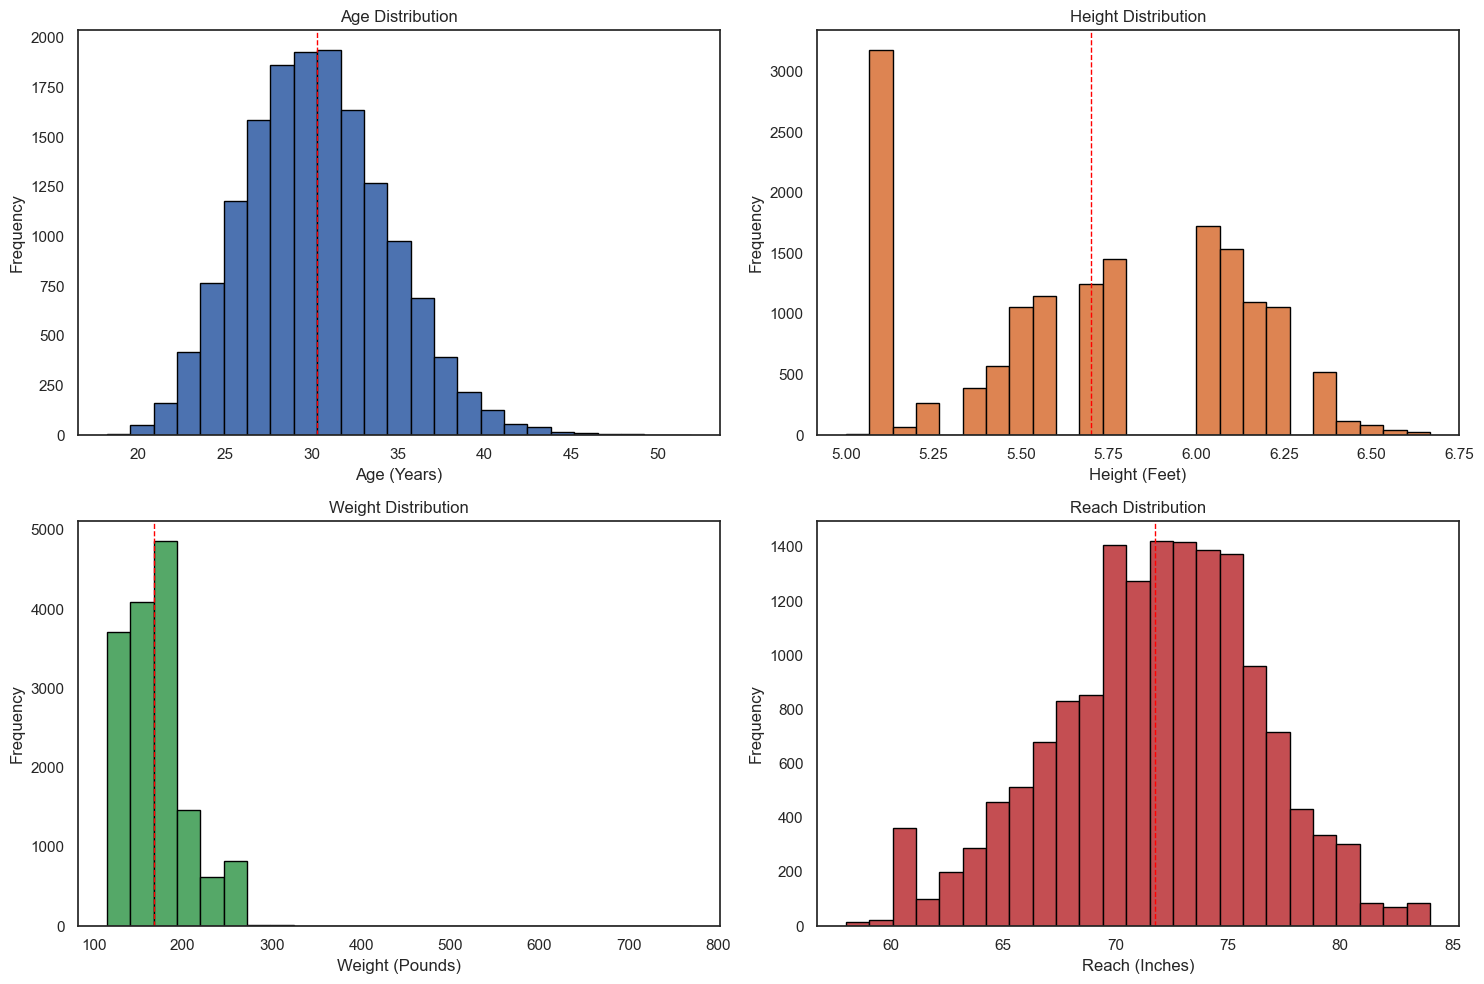

In [4]:
# Set Theme
sns.set_theme(style="white")

# Create Subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot Histograms
# Age
ages.hist(bins=25, edgecolor='black', color=sns.color_palette("deep")[0], ax=axes[0, 0])
mean_age = ages.mean()
# Add Mean Line
axes[0, 0].axvline(mean_age, color='red', linestyle='dashed', linewidth=1)
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age (Years)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(False)

# Height
heights.hist(bins=25, edgecolor='black', color=sns.color_palette("deep")[1], ax=axes[0, 1])
mean_height = heights.mean()
# Add Mean Line
axes[0, 1].axvline(mean_height, color='red', linestyle='dashed', linewidth=1)
axes[0, 1].set_title('Height Distribution')
axes[0, 1].set_xlabel('Height (Feet)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(False)

# Weight
weights.hist(bins=25, edgecolor='black', color=sns.color_palette("deep")[2], ax=axes[1, 0])
mean_weight = weights.mean()
# Add Mean Line
axes[1, 0].axvline(mean_weight, color='red', linestyle='dashed', linewidth=1)
axes[1, 0].set_title('Weight Distribution')
axes[1, 0].set_xlabel('Weight (Pounds)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(False)

# Reach
reaches.hist(bins=25, edgecolor='black', color=sns.color_palette("deep")[3], ax=axes[1, 1])
mean_reach = reaches.mean()
# Add Mean Line
axes[1, 1].axvline(mean_reach, color='red', linestyle='dashed', linewidth=1)
axes[1, 1].set_title('Reach Distribution')
axes[1, 1].set_xlabel('Reach (Inches)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(False)

# Adjust Layout
plt.tight_layout()
plt.show()

### Win Method

,Method,Count
0,Decision - Unanimous,2774
1,KO/TKO,2469
2,Submission,1541
3,Decision - Split,755
4,TKO - Doctor's Stoppage,93
5,Decision - Majority,93
6,Overturned,57
7,Could Not Continue,29
8,DQ,23
9,Other,2


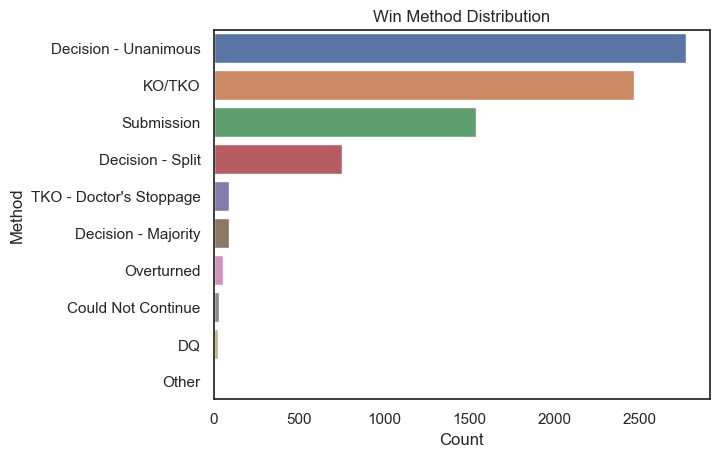

In [5]:
method_counts = fights['Method'].value_counts().reset_index()
method_counts.columns = ['Method', 'Count']
display(method_counts)
sns.barplot(x = 'Count', y = 'Method', data = method_counts, hue = 'Method', palette = 'deep')
plt.title('Win Method Distribution')
plt.xlabel('Count')
plt.ylabel('Method')
plt.show()

### Stance

,Stance,Count
0,Orthodox,2602
1,Southpaw,575
2,Switch,204
3,Open Stance,7
4,Sideways,3


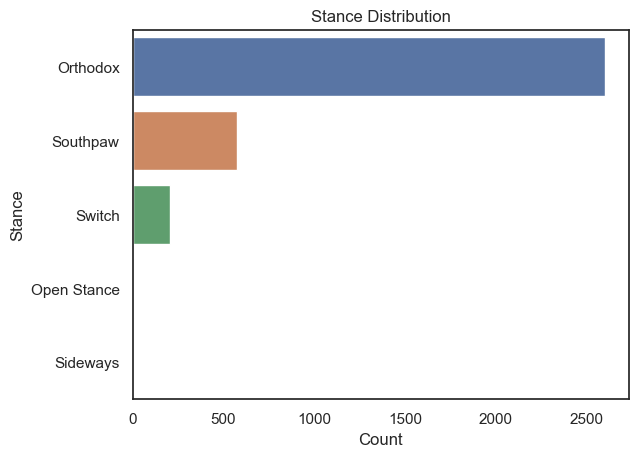

In [6]:
stance_counts = fighters['Stance'].value_counts().reset_index()
stance_counts.columns = ['Stance', 'Count']
display(stance_counts)
sns.barplot(x= 'Count', y = 'Stance', data = stance_counts, hue = 'Stance', palette = 'deep')
plt.title('Stance Distribution')
plt.xlabel('Count')
plt.ylabel('Stance')
plt.show()

### Division

,Division,Count
0,Men's Flyweight,346
1,Men's Bantamweight,682
2,Men's Featherweight,761
3,Men's Lightweight,1343
4,Men's Welterweight,1297
5,Men's Middleweight,1030
6,Men's Light Heavyweight,692
7,Men's Heavyweight,714
8,Other,182


,Division,Count
0,Women's Strawweight,314
1,Women's Flyweight,235
2,Women's Bantamweight,211
3,Women's Featherweight,29


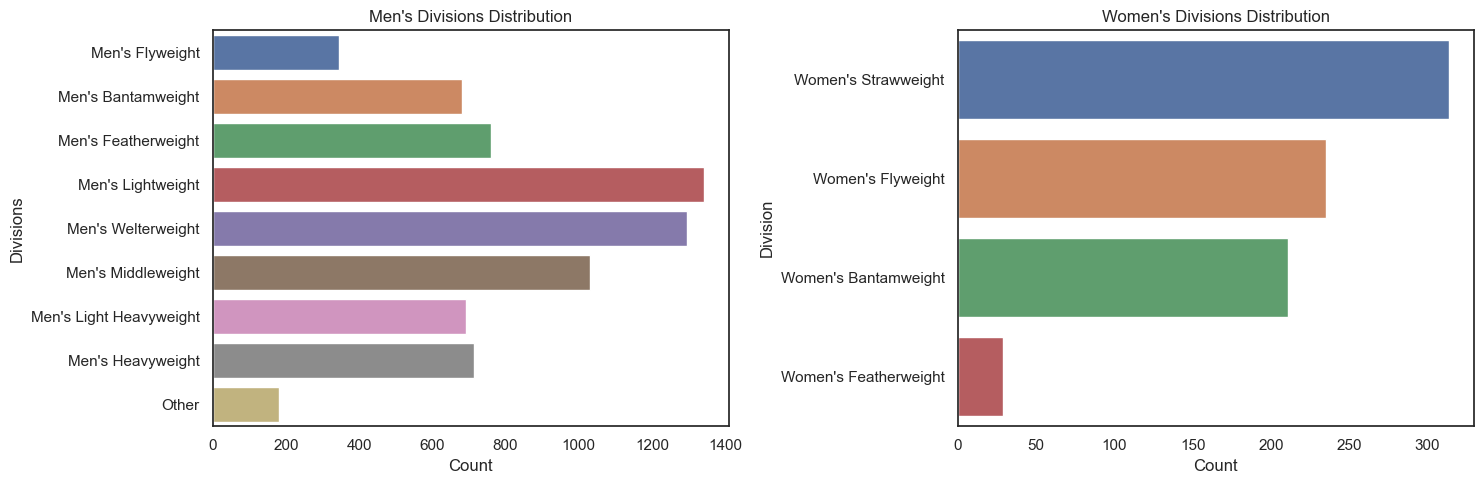

In [7]:
mens_divisions = ["Men's Flyweight", "Men's Bantamweight", "Men's Featherweight", "Men's Lightweight", "Men's Welterweight", "Men's Middleweight", "Men's Light Heavyweight", "Men's Heavyweight", "Other"]
womens_divisions = ["Women's Strawweight", "Women's Flyweight", "Women's Bantamweight", "Women's Featherweight"]

# Create Dictionaries
mens_dictionary = {}
womens_dictionary = {}
for division in mens_divisions:
    mens_dictionary[division] = 0
for division in womens_divisions:
    womens_dictionary[division] = 0

# Count Division Occurrences
for division in fights['Division']:
    if "Women's" in division and "Strawweight" in division:
        womens_dictionary["Women's Strawweight"] += 1
    elif "Women's" in division and "Flyweight" in division:
        womens_dictionary["Women's Flyweight"] += 1
    elif "Women's" in division and "Bantamweight" in division:
        womens_dictionary["Women's Bantamweight"] += 1
    elif "Women's" in division and "Featherweight" in division:
        womens_dictionary["Women's Featherweight"] += 1
    elif "Flyweight" in division:
        mens_dictionary["Men's Flyweight"] += 1
    elif "Bantamweight" in division:
        mens_dictionary["Men's Bantamweight"] += 1
    elif "Featherweight" in division:
        mens_dictionary["Men's Featherweight"] += 1
    elif "Lightweight" in division:
        mens_dictionary["Men's Lightweight"] += 1
    elif "Welterweight" in division:
        mens_dictionary["Men's Welterweight"] += 1
    elif "Middleweight" in division:
        mens_dictionary["Men's Middleweight"] += 1
    elif "Light Heavyweight" in division:
        mens_dictionary["Men's Light Heavyweight"] += 1
    elif "Heavyweight" in division:
        mens_dictionary["Men's Heavyweight"] += 1
    else:
        mens_dictionary["Other"] += 1

mens_df = pd.DataFrame.from_dict(mens_dictionary, orient = 'index', columns = ['Counts']).reset_index()
mens_df.columns = ['Division', 'Count']
display(mens_df)

womens_df = pd.DataFrame.from_dict(womens_dictionary, orient = 'index', columns = ['Counts']).reset_index()
womens_df.columns = ['Division', 'Count']
display(womens_df)

# Graph
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
sns.barplot(x = 'Count', y = 'Division', data = mens_df, hue = 'Division', palette = 'deep', ax = axes[0])
axes[0].set_title("Men's Divisions Distribution")
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Divisions')

sns.barplot(x= 'Count', y = 'Division', data = womens_df, hue = 'Division', palette = 'deep', ax = axes[1])
axes[1].set_title("Women's Divisions Distribution")
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Division')

plt.tight_layout()
plt.show()

### Dates

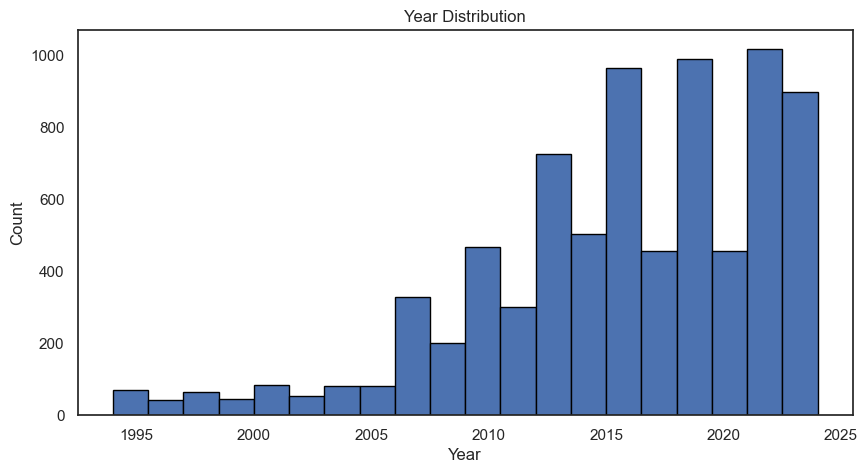

In [8]:
dates = pd.to_datetime(fights['Date']).copy()
years = dates.dt.year
plt.figure(figsize = (10, 5))
plt.hist(years, bins = 20, edgecolor = 'black')
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


### Correlation Matrix

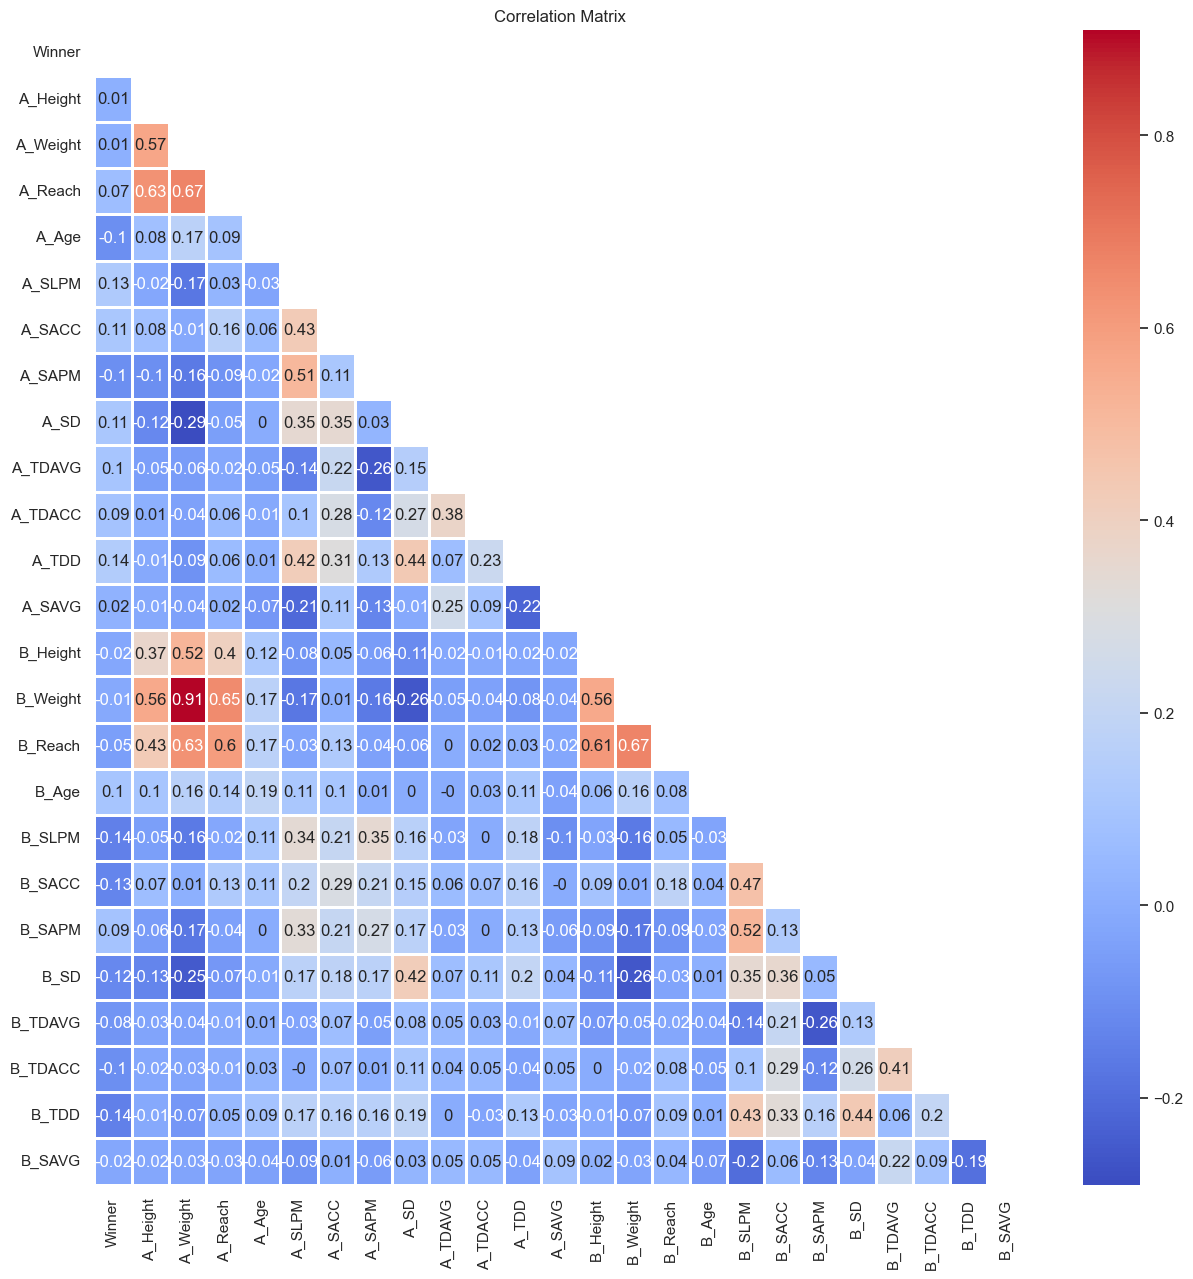

In [9]:
# Correlation Matrix
correlation_matrix = df.corr(numeric_only = True).round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))

plt.figure(figsize = (15, 15))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 1, mask = mask)
plt.title('Correlation Matrix')
plt.show()